<a href="https://colab.research.google.com/github/guilhermelaviola/BIArchitectureAndBigData/blob/main/Class09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analytical CRM**
Exploring how data analysis can improve customer relationship management by anticipating their needs and improving communication.

In [1]:
pip install squarify

In [2]:
# Importing all the necessary libraries:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

pd.set_option('display.max_columns', None)

In [3]:
# Downloading the dataset:
!gdown 13KobAmR6rdEcWTUrd7rlZ6JYhe2TfDqC

Downloading...
From: https://drive.google.com/uc?id=13KobAmR6rdEcWTUrd7rlZ6JYhe2TfDqC
To: /content/Customer Segmentation.csv
100% 13.5M/13.5M [00:00<00:00, 64.3MB/s]


In [4]:
# Importing and displaying the dataset:
df = pd.read_csv('Customer Segmentation.csv')
df

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,phone,street_address,street_name,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
0,Priscella,Pollett,Honorable,Agender,ppollett0@foxnews.com,Sesheke,Zambia,ZM,-17.473886,24.295514,222-398-8279,93 Fremont Drive,Green,90004,Crossing,Africa/Lusaka,Omba,Support,Internal Auditor,Indonesian,University of Zambia,Lifestyle,129.60.144.253
1,Ana,Onge,Mr,Male,aonge1@fda.gov,Querecotillo,Peru,PE,-4.838304,-80.648215,650-786-5808,0841 Troy Park,Gerald,9,Center,America/Lima,Cogidoo,Sales,Compensation Analyst,Fijian,Universidad Nacional de San Antonio Abad,Healthcare Industry,100.2.67.41
2,Butch,Rawls,Mrs,Male,brawls2@slideshare.net,Licupis,Peru,PE,-6.424052,-79.242648,325-412-0143,09450 Rowland Center,Eggendart,5104,Point,America/Lima,Edgewire,Support,Health Coach II,Gujarati,Universidad Nacional de San Martín,Visual SVN,48.161.197.47
3,Ambros,Fairrie,Rev,Male,afairrie3@reuters.com,Yonghe,China,CN,36.759507,110.632006,664-380-9221,5173 Nelson Alley,Annamark,8,Center,Asia/Harbin,Digitube,Support,General Manager,Belarusian,Fuzhou University,Nanofabrication,36.188.226.116
4,Gaylene,Titcomb,Honorable,Female,gtitcomb4@dyndns.org,Wang Yang,Thailand,TH,17.074088,104.449040,477-429-2626,833 Vermont Drive,Clarendon,994,Trail,Asia/Bangkok,Quaxo,Engineering,Internal Auditor,Papiamento,Mahachulalongkorn Buddhist University,AQL,181.24.84.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50995,Madeleine,Beales,Mrs,Female,mbealesrn@dagondesign.com,Point Hill,Jamaica,JM,18.090238,-77.109170,259-755-6269,3418 Farragut Alley,Debs,500,Trail,America/Jamaica,Flashpoint,Marketing,Pharmacist,Dhivehi,"University of the West Indies, Mona",Capital Equipment,194.87.138.177
50996,Tiena,Linfoot,Mrs,Female,tlinfootro@reddit.com,Jiesheng,China,CN,22.713664,115.458167,319-442-0470,80 Gina Parkway,Mayer,5983,Trail,Asia/Shanghai,Skajo,Services,Graphic Designer,Arabic,Hubei University,PE,218.8.15.234
50997,Warren,Skeggs,Mr,Male,wskeggsrp@who.int,El Copey,Colombia,CO,10.148976,-73.960233,745-639-8096,2541 Blaine Way,Kinsman,47,Parkway,America/Bogota,Mybuzz,Accounting,VP Sales,Kyrgyz,Conservatorio del Tolima,BPWin,94.174.254.81
50998,Collette,Aspy,Dr,Polygender,caspyrq@weather.com,Xiaping,China,CN,27.568278,117.562238,177-615-0101,45709 Larry Terrace,Carioca,334,Parkway,Asia/Shanghai,Eire,Legal,Assistant Media Planner,Amharic,China Agriculture University East,Aquariums,239.103.209.178


<Axes: >

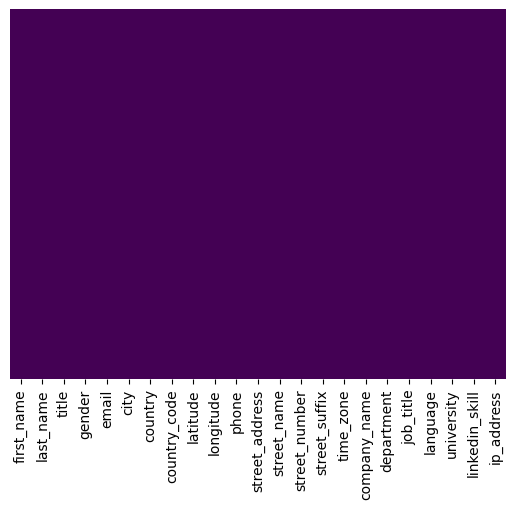

In [5]:
# Plotting heatmap:
sns.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

In [6]:
df.nunique()

,0
first_name,8416
last_name,31257
title,6
gender,8
email,51000
city,24921
country,235
country_code,234
latitude,26324
longitude,25821


Text(0, 0.5, 'departamento')

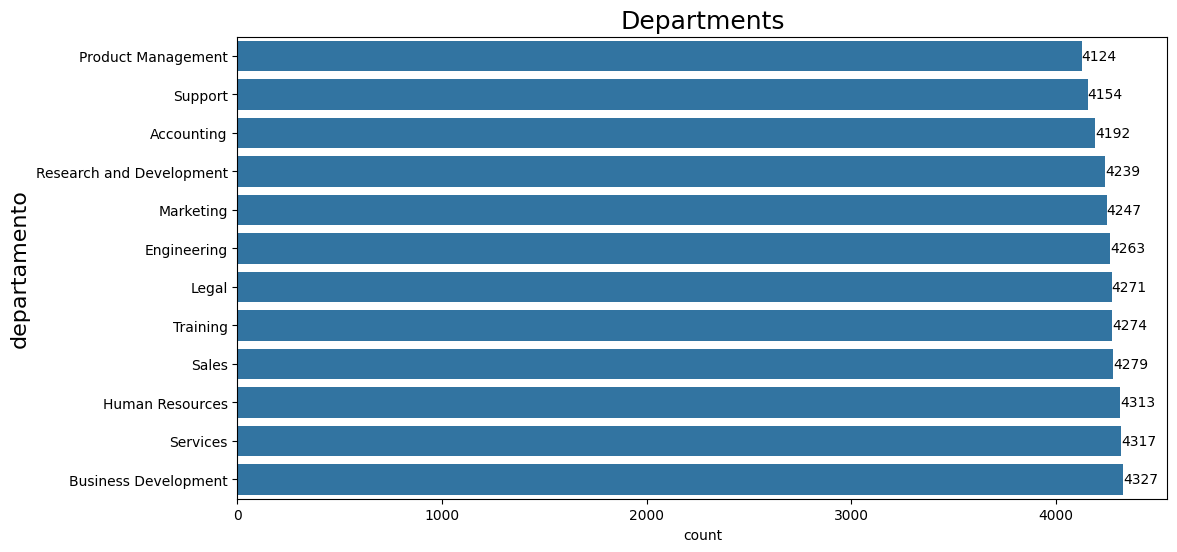

In [7]:
# Plotting bar chart with departments:
plt.figure(figsize=(12, 6))
department = df['department']
ax=sns.countplot(y= department ,data =df,orient='h',order=department.value_counts().sort_values().index)
plt.title('Departments', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Quantity', fontsize=16)
plt.ylabel('departamento', fontsize=16)

Text(0, 0.5, 'Gender')

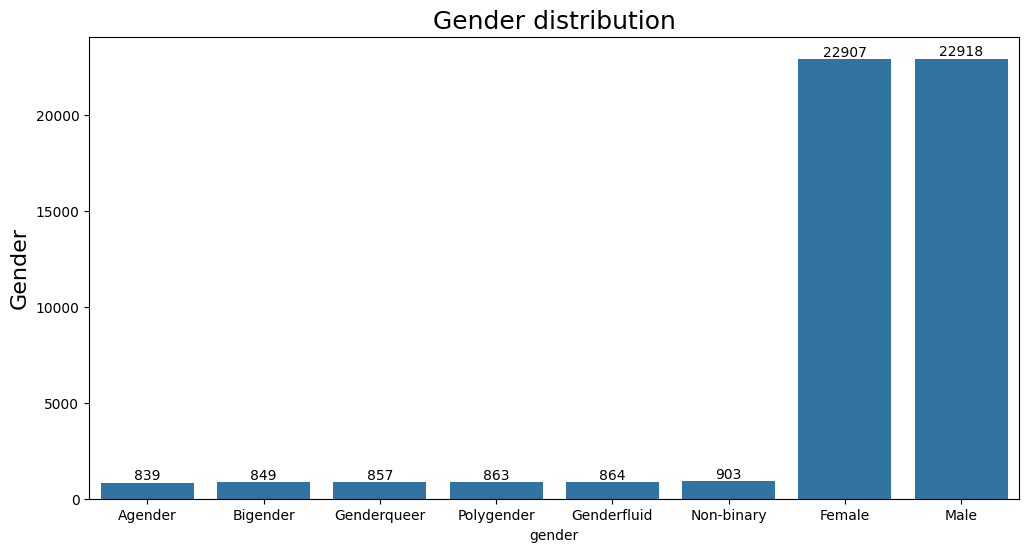

In [8]:
# Plotting bar chart with gender distribution:
plt.figure(figsize=(12, 6))
sex = df['gender']
ax=sns.countplot(x= sex ,data =df,orient='v',order=sex.value_counts().sort_values().index)
plt.title('Gender distribution', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Quantity', fontsize=16)
plt.ylabel('Gender', fontsize=16)

Text(0, 0.5, 'Region')

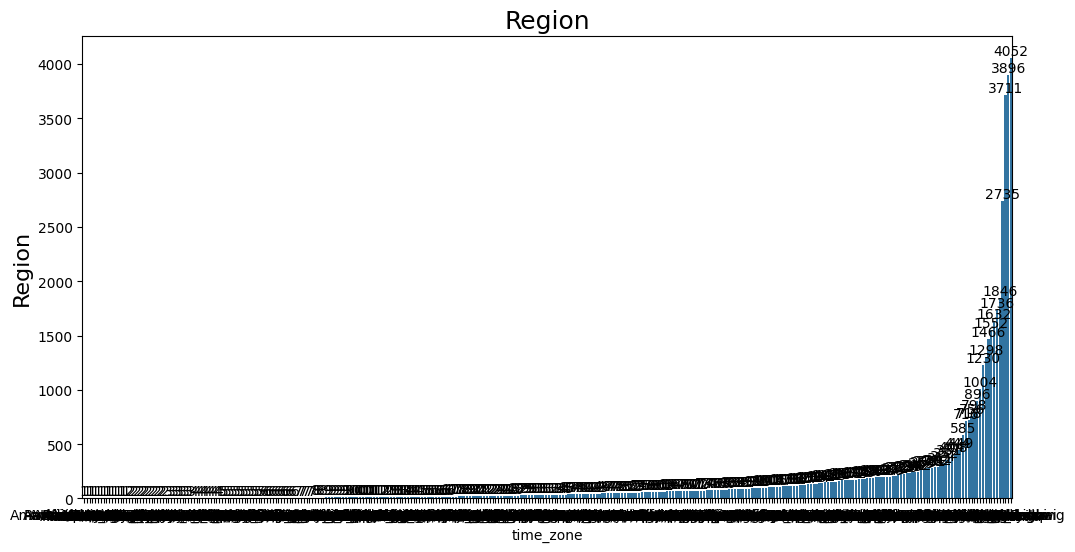

In [9]:
# Plotting a bar chart with region:
plt.figure(figsize=(12, 6))
continent = df['time_zone']
ax=sns.countplot(x= continent ,data =df,orient='v',order=continent.value_counts().sort_values().index)
plt.title('Region', fontsize=18)
ax.bar_label(ax.containers[0])
plt.ylabel('Quantity', fontsize=16)
plt.ylabel('Region', fontsize=16)

In [10]:
# Splitting string on every '/':
df['time_zone'] = df['time_zone'].str.split('/').str[0]

# **Segmentation**

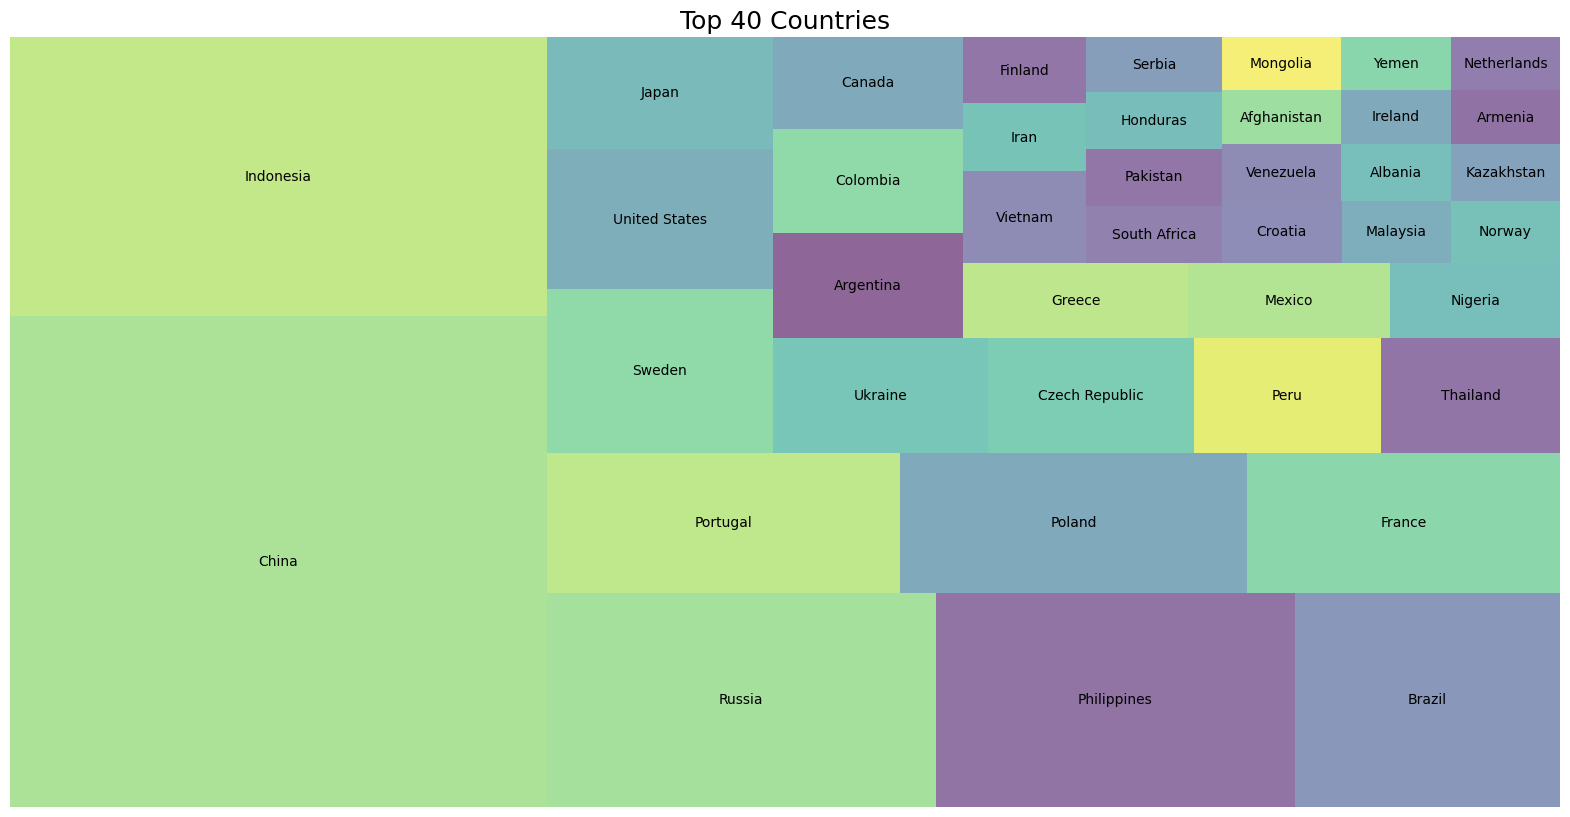

In [11]:
# Plotting a Treemap with top 40 countries:
plt.figure(figsize=(20, 10))
sizes = df['country'].value_counts()[:40]
labels = sizes.index.tolist()
squarify.plot(sizes=sizes, label=labels, alpha=0.6)
plt.title('Top 40 Countries', fontsize=18)
plt.axis('off')
plt.show()

In [12]:
# Filtering the dataset with instances related to Brazil:
brazil = df[df['country'] == 'Brazil']
brazil

,first_name,last_name,title,gender,email,city,country,country_code,latitude,longitude,phone,street_address,street_name,street_number,street_suffix,time_zone,company_name,department,job_title,language,university,linkedin_skill,ip_address
5,Cleveland,Lindegard,Mr,Female,clindegard5@ezinearticles.com,Tarauacá,Brazil,BR,-8.213232,-71.382437,179-490-8666,2 Tomscot Court,Oak,6390,Center,America,Shuffletag,Sales,Mechanical Systems Engineer,Portuguese,Universidade Vale do Rio Doce,Occupational Therapists,221.193.207.249
31,Margret,Thridgould,Ms,Female,mthridgouldv@ucla.edu,Cordeirópolis,Brazil,BR,-22.493938,-47.429433,513-939-8601,29 Milwaukee Center,3rd,3532,Terrace,America,Vipe,Training,Environmental Tech,Nepali,Universidade Santa Cecília dos Bandeirantes,NCP,12.51.107.204
33,Molli,Sherwen,Rev,Male,msherwenx@nymag.com,Araçuaí,Brazil,BR,-16.848817,-42.063300,629-238-5782,95 Waxwing Lane,Burning Wood,92868,Point,America,Skinder,Product Management,Chief Design Engineer,Tok Pisin,Universidade do Rio de Janeiro,OEM negotiations,1.237.183.159
40,Devin,Wethers,Mrs,Genderfluid,dwethers14@youku.com,Parintins,Brazil,BR,-2.624236,-56.734617,430-307-2420,1 Laurel Lane,Waubesa,20782,Terrace,America,Gabtype,Product Management,Analyst Programmer,Bengali,Universidade Católica Dom Bosco,High Rise,230.18.222.23
58,Nobie,Bearman,Rev,Male,nbearman1m@forbes.com,Caçapava do Sul,Brazil,BR,-30.514844,-53.483238,859-109-1085,48 Hansons Road,Banding,670,Junction,America,Skinder,Product Management,Biostatistician III,Guaraní,Universidade do Grande Rio,CFTC,92.0.50.250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50806,Morrie,Ovendon,Dr,Female,movendonme@booking.com,Caçapava do Sul,Brazil,BR,-30.514844,-53.483238,988-472-0749,59711 Walton Way,Larry,937,Drive,America,Edgewire,Business Development,Automation Specialist III,Kazakh,Centro Universitário Newton Paiva,Atomic Absorption,253.154.245.68
50841,Raphaela,Shadfourth,Dr,Male,rshadfourthnd@yandex.ru,Amaraji,Brazil,BR,-8.374877,-35.455134,327-677-6953,43 Mesta Circle,Mockingbird,578,Street,America,Thoughtstorm,Legal,Accountant II,Quechua,Universidade Federal da Bahia,RVs,15.107.108.130
50846,Gilberta,Gashion,Ms,Female,ggashionni@soup.io,Oliveira,Brazil,BR,-20.698430,-44.825678,694-373-0464,67 Warrior Point,Brentwood,8351,Place,America,Tagopia,Marketing,Business Systems Development Analyst,Montenegrin,Faculdades Integradas Curitiba,IBM Websphere Commerce,103.211.129.63
50908,Rem,Bourley,Ms,Female,rbourleyp8@flavors.me,Arapiraca,Brazil,BR,-9.755588,-36.663958,594-821-9095,68 Stuart Avenue,Stuart,66631,Pass,America,Eare,Business Development,Cost Accountant,Burmese,Universidade Estadual de Feira de Santana,Market Planning,152.191.73.52


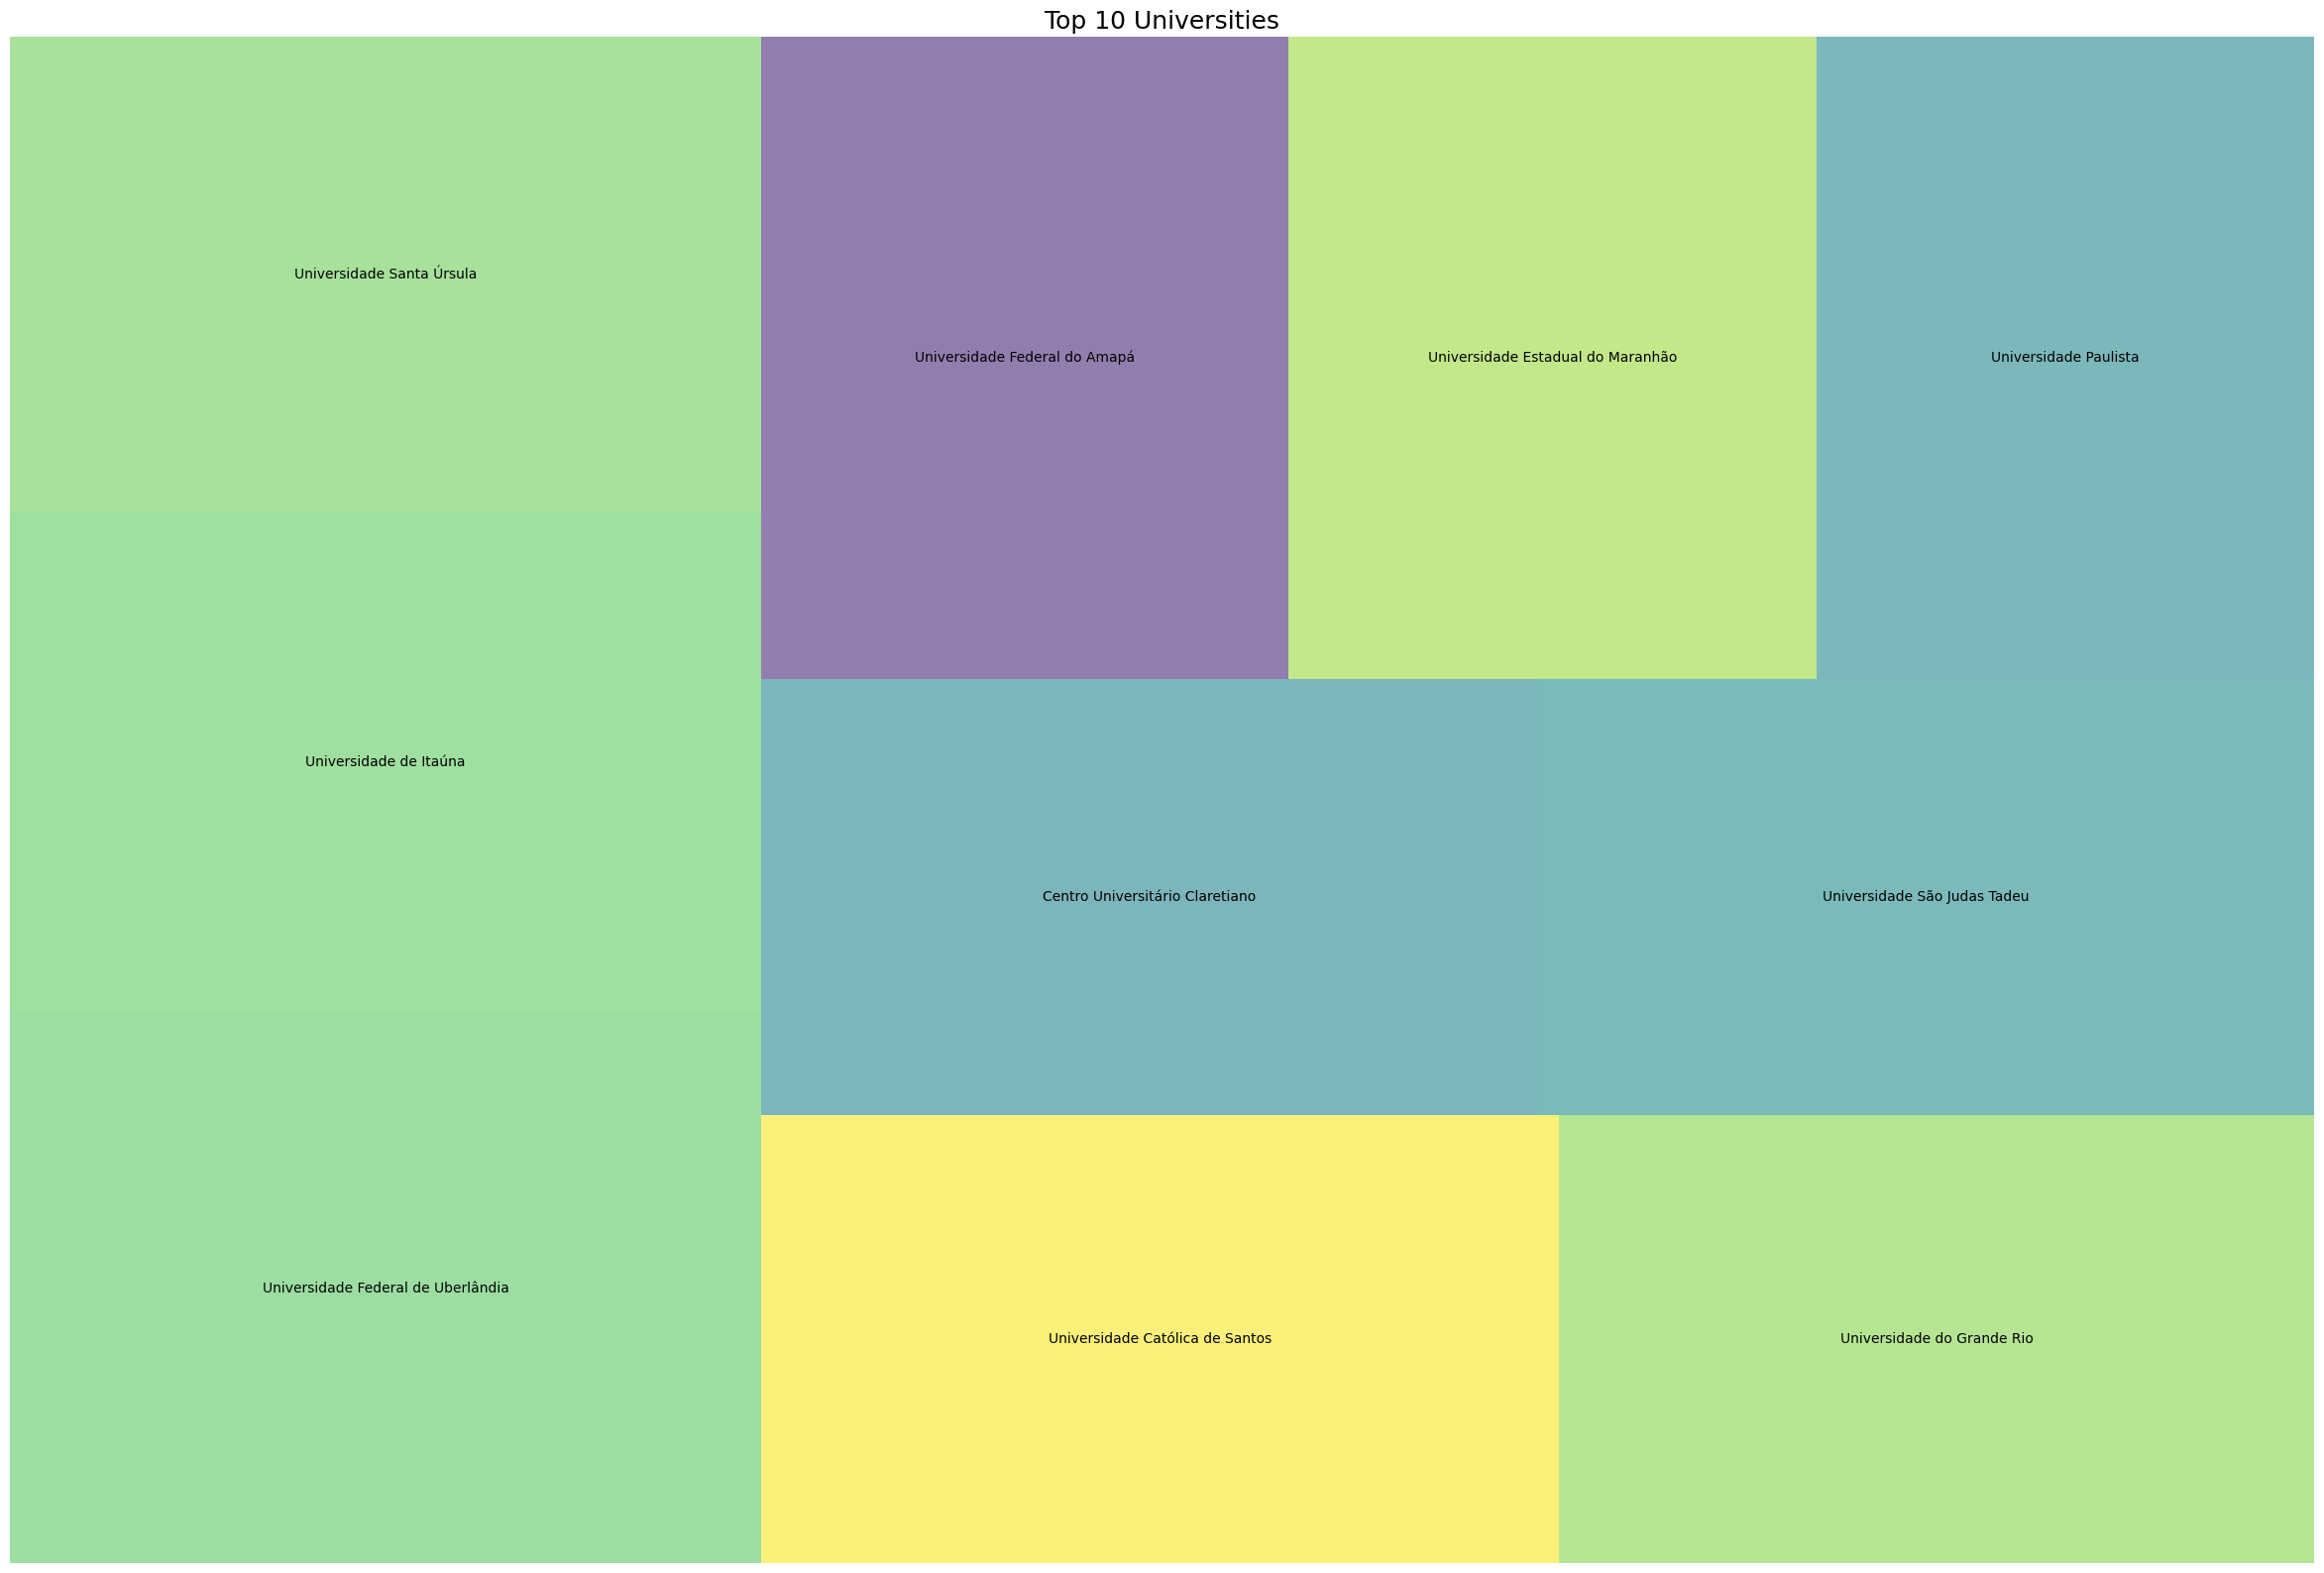

In [13]:
# Plotting a Treemap with top 40 universities:
plt.figure(figsize=(30, 20))
sizes = brazil['university'].value_counts()[:10]
labels = sizes.index.tolist()
squarify.plot(sizes=sizes, label=labels, alpha=0.6)
plt.title('Top 10 Universities', fontsize=18)
plt.axis('off')
plt.show()